# Plot current distributions of RPC from CMS

## Data preprocessing functions


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

from matplotlib.patches import Rectangle

import numpy as np
#import mplhep as hep
#plt.style.use(hep.style.CMS)

**convert_dpid_name(df_data, df_mapping)**

This function takes a data DataFrame, df_data, and a mapping DataFrame, df_mapping, and adds a new column called 'Chamber_name' to the data DataFrame. This new column contains the names of chambers corresponding to the values in the 'DPID' column of the data DataFrame, based on the mapping provided in the mapping DataFrame.

In [ ]:
def convert_dpid_name(df_data, df_mapping):

    # Take df colums to numpy array
    k = df_mapping['DPID2'].to_numpy()
    v = df_mapping['CHAMBER_NAME'].to_numpy()

    # Convert both arrays to a dict.
    dicmap =  dict(zip(k, v))

    # Takes the chamber names from the mapping file and add it in a new column
    # to the data dataframe
    df_data['Chamber_name'] = df_data['DPID'].map(dicmap)

    df_data_mapped = df_data

    return df_data_mapped

**individual_wheel(wheel, voltage, df_data):**

This function returns only the entries from a dataframe with the desired wheel and voltage.




we use the
*np.where(condition, consecuence if the condition is true, the same if the condition is false)*




*string.find(value, start, end)*

return the number where the value is find in a string.

W+2_RB1in_S01
W+2 == 0
_RB1in == 1
_S01 == 2


In our case, we need that the string starts with the word "wheel", where this wheel can be "W+1", "W-1", "W+2", "W-2" and "W0".


In [ ]:
def individual_wheel(wheel, voltage, df_data):

    # Filter for select the wished voltage
    df_data = df_data[(df_data.V_APPLIED == voltage)]

    # Filter for select the wished wheel
    df_wheel = df_data[np.where(df_data['Chamber_name'].str.find(wheel) == 0, True, False) == True]
    #just return the wheel
    return df_wheel

**select_endcap(region, voltage, df_data):**

This function returns only the entries from a dataframe with the desired region and voltage. Apply a filter.

In [ ]:
def select_endcap(region, voltage, df_data):

    # Filter for select the wished voltage
    df_data = df_data[(df_data.V_APPLIED == voltage)]

    # Filter for select the wished endcap
    df_endcap = df_data[np.where(df_data['Chamber_name'].str.find(region) == 0, True, False) == True]

    '''if region == 'RE-' or region =='RE+':
        df_endcap = df_data[np.where(df_data['Chamber_name'].str.find(region) == 0, True, False) == True]
        df_endcap = df_endcap[np.where(df_endcap['Chamber_name'].str.find('RE+4') != 0, True, False) == True]
        df_endcap = df_endcap[np.where(df_endcap['Chamber_name'].str.find('RE-4') != 0, True, False) == True]
    else:
        df_endcap = df_endcap[np.where(df_endcap['Chamber_name'].str.find('RE+4') == 0, True, False) == True]
        df_endcap = df_endcap[np.where(df_endcap['Chamber_name'].str.find('RE-4') != 0, True, False) == True]'''

    return df_endcap

**filter_current_data(data_required, date):**

This function returns only the entries from a dataframe with the desired date.



In [ ]:
def filter_current_data(data_required, date):

    df_date_to_plot = data_required[np.where(data_required['DATE'].str.find(date) == 0, True, False) == True]
    df_current = df_date_to_plot['AVG_IMON']

    return df_current

**plot(data_to_plot, dates_array, bins=80):**

Defines a set of predefined colors in the 'colors' array.

Creates a figure and subplot axes using plt.subplots().

Iterates through the dates in dates_array.

For each date, filters the entries in the data_to_plot DataFrame that correspond to that date and calculates the histogram of values in the 'AVG_IMON' column using df_current.plot.hist().

If the mean of the values in the 'AVG_IMON' column for that date is NaN (not numeric), it prints a message indicating that there is no data available for that date.

Adds a histogram with a specific color for that date to the plot.

Creates legends and labels for the X and Y axes, as well as for the plot legend.

Saves the plot to a file with a name that depends on the value of 'Chamber_name' in the input DataFrame.


In [ ]:
def plot(data_to_plot, dates_array, bins=80):
    #define an array of specific colors
    colors = np.array(['#e41a1c','#377eb8','#4daf4a','#984ea3','#ff7f00','#ffff33','#a65628','#f781bf','#449166','#6d9509','#1f465e'])
    handles = []
    labels = []
    #create a figure of subplots
    fig, ax = plt.subplots()

    for i, j in enumerate(dates_array):
        #filter the data to return only entries with the desired date
        df_date_to_plot = data_to_plot[np.where(data_to_plot['DATE'].str.find(j) == 0, True, False) == True]
        df_current = df_date_to_plot['AVG_IMON']
        #if the mean current in this date is a nan then print there is not data available, else pass
        if np.isnan(round(df_current.mean(),2)):
            print(f"There is no data available for: {j}")
            continue
        #creates a mean currents histogram
        histogr = df_current.plot.hist(bins=bins, alpha=1.0, color=colors[i],  histtype='step', linewidth=2, range=(0, 20))

        handles.append(Rectangle((0,0), 1, 1, color=colors[i], ec="k"))
        labels.append(j + f"-mean: {round(df_current.mean(),2)} uA")


    # Xlabel
    ax.xaxis.set_label_coords(0.90, -0.055)
    ax.set_xlabel(r'$I(\mu A)$', fontsize = 22)

    # Ylabel
    ax.yaxis.set_label_coords(-0.09, 0.86)
    ax.set_ylabel('Entries', fontsize = 22)

    #print this objects in the plot
    plt.legend(handles, labels)

    # CMS format
    hfont = {'fontname':'Helvetica'}
    plt.text(0.13, 0.89, "CMS", fontdict=hfont,  fontweight='bold', transform=plt.gcf().transFigure)
    plt.text(0.23, 0.89, "Preliminary", fontdict=hfont, style='italic',fontsize = 22, transform=plt.gcf().transFigure)

    plt.grid()

    ## Takes the first element column chamber name in order to save with the correct name
    # This works for W+-2 and W+-1
    name = data_to_plot['Chamber_name'].to_numpy()[1][0:3]
    # This works for
    if name[2] == '_':
        name = name[0:2]

    plt.savefig("Current_distribution_" + name +".png")

## load the df_data and the df_mapping

In [ ]:
# Path for the data
data_path = "data_october_2021.csv"

# Transform the .csv in a panda dataframe
df_data = pd.read_csv('https://raw.githubusercontent.com/Mapse/RPC_Currents/main/data_october_2021.csv')

# Mapping between dpid and chamber name
mapping_file_path = "RPC_Chamber_HV_Map.csv"
df_mapping = pd.read_csv('https://raw.githubusercontent.com/Mapse/RPC_Currents/main/RPC_Chamber_HV_Map.csv')

voltage =9200

df_mapping.head()

,DPID2,CHAMBER_NAME
0,315,W+2_RB1in_S01
1,316,W+2_RB1out_S01
2,317,W+2_RB2in_S01
3,318,W+2_RB2out_S01
4,319,W+2_RB3-_S01


In [ ]:
df_data.head()

,DPID,DATE,START_DATE,STOP_DATE,V_APPLIED,AVG_IMON
0,315.0,14-SEP-16 06.44.51.000000 PM,14-SEP-16 07.58.33.000000 PM,14-SEP-16 09.20.56.000000 PM,3000.0,0.200000
1,315.0,14-SEP-16 06.44.51.000000 PM,14-SEP-16 09.21.32.000000 PM,14-SEP-16 10.55.29.000000 PM,4000.0,0.178129
2,315.0,14-SEP-16 06.44.51.000000 PM,14-SEP-16 10.56.05.000000 PM,15-SEP-16 03.26.16.000000 AM,5000.0,0.122341
3,315.0,14-SEP-16 06.44.51.000000 PM,15-SEP-16 03.26.52.000000 AM,15-SEP-16 04.31.02.000000 AM,6000.0,0.300000
4,315.0,14-SEP-16 06.44.51.000000 PM,15-SEP-16 04.31.02.000000 AM,15-SEP-16 05.35.48.000000 AM,7000.0,0.300000


In [ ]:
df_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 212144 entries, 0 to 212143
Data columns (total 6 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   DPID        212143 non-null  float64
 1   DATE        212143 non-null  object 
 2   START_DATE  212143 non-null  object 
 3   STOP_DATE   212143 non-null  object 
 4   V_APPLIED   212143 non-null  float64
 5   AVG_IMON    212143 non-null  float64
dtypes: float64(3), object(3)
memory usage: 9.7+ MB


## diferent kinds of filters

In [ ]:
convert_dpid_name(df_data, df_mapping)

,DPID,DATE,START_DATE,STOP_DATE,V_APPLIED,AVG_IMON,Chamber_name
0,315.0,14-SEP-16 06.44.51.000000 PM,14-SEP-16 07.58.33.000000 PM,14-SEP-16 09.20.56.000000 PM,3000.0,0.200000,W+2_RB1in_S01
1,315.0,14-SEP-16 06.44.51.000000 PM,14-SEP-16 09.21.32.000000 PM,14-SEP-16 10.55.29.000000 PM,4000.0,0.178129,W+2_RB1in_S01
2,315.0,14-SEP-16 06.44.51.000000 PM,14-SEP-16 10.56.05.000000 PM,15-SEP-16 03.26.16.000000 AM,5000.0,0.122341,W+2_RB1in_S01
3,315.0,14-SEP-16 06.44.51.000000 PM,15-SEP-16 03.26.52.000000 AM,15-SEP-16 04.31.02.000000 AM,6000.0,0.300000,W+2_RB1in_S01
4,315.0,14-SEP-16 06.44.51.000000 PM,15-SEP-16 04.31.02.000000 AM,15-SEP-16 05.35.48.000000 AM,7000.0,0.300000,W+2_RB1in_S01
...,...,...,...,...,...,...,...
212139,6493.0,2021-10-15 07:05:56,2021-10-15 10:57:05,2021-10-15 11:08:14,9000.0,1.100000,W0_RB1in_S06
212140,6493.0,2021-10-15 07:05:56,2021-10-15 09:28:52,2021-10-15 10:19:28,6000.0,0.900000,W0_RB1in_S06
212141,6493.0,2021-10-15 07:05:56,2021-10-15 10:21:14,2021-10-15 10:39:58,7000.0,0.800000,W0_RB1in_S06
212142,6493.0,2021-10-15 07:05:56,2021-10-15 10:40:52,2021-10-15 10:55:52,8000.0,0.971333,W0_RB1in_S06


wheel filter

In [ ]:
df_data[df_data['Chamber_name'].str.find("W+1")==0]

,DPID,DATE,START_DATE,STOP_DATE,V_APPLIED,AVG_IMON,Chamber_name
5401,2928.0,14-SEP-16 06.44.51.000000 PM,14-SEP-16 06.44.51.000000 PM,14-SEP-16 07.58.33.000000 PM,2000.0,0.482338,W+1_RB1in_S01
5402,2928.0,14-SEP-16 06.44.51.000000 PM,14-SEP-16 07.58.33.000000 PM,14-SEP-16 09.21.08.000000 PM,3000.0,0.442846,W+1_RB1in_S01
5403,2928.0,14-SEP-16 06.44.51.000000 PM,14-SEP-16 09.21.32.000000 PM,14-SEP-16 10.55.29.000000 PM,4000.0,0.732695,W+1_RB1in_S01
5404,2928.0,14-SEP-16 06.44.51.000000 PM,14-SEP-16 10.56.05.000000 PM,15-SEP-16 03.26.16.000000 AM,5000.0,0.844815,W+1_RB1in_S01
5405,2928.0,14-SEP-16 06.44.51.000000 PM,15-SEP-16 03.26.52.000000 AM,15-SEP-16 04.31.02.000000 AM,6000.0,1.000000,W+1_RB1in_S01
...,...,...,...,...,...,...,...
207394,3253.0,2021-10-14 14:22:19,2021-10-15 05:34:31,2021-10-15 06:34:39,7000.0,0.800000,W+1_RB4+_S12
207395,3253.0,2021-10-14 14:22:19,2021-10-15 06:36:37,2021-10-15 09:28:37,8000.0,0.933857,W+1_RB4+_S12
207396,3253.0,2021-10-14 14:22:19,2021-10-15 09:29:14,2021-10-15 10:45:47,9000.0,1.178620,W+1_RB4+_S12
207397,3253.0,2021-10-14 14:22:19,2021-10-15 10:45:47,2021-10-15 11:18:08,9200.0,1.100000,W+1_RB4+_S12


rings barrel RB filter

In [ ]:
df_data[df_data['Chamber_name'].str.find("_RB1in")==2]

,DPID,DATE,START_DATE,STOP_DATE,V_APPLIED,AVG_IMON,Chamber_name
9517,3033.0,14-SEP-16 06.44.15.000000 PM,14-SEP-16 06.44.15.000000 PM,14-SEP-16 07.58.33.000000 PM,2000.0,0.266801,W0_RB1in_S01
9518,3033.0,14-SEP-16 06.44.15.000000 PM,14-SEP-16 07.58.33.000000 PM,14-SEP-16 09.21.08.000000 PM,3000.0,0.504420,W0_RB1in_S01
9519,3033.0,14-SEP-16 06.44.15.000000 PM,14-SEP-16 09.21.08.000000 PM,14-SEP-16 10.55.29.000000 PM,4000.0,0.600000,W0_RB1in_S01
9520,3033.0,14-SEP-16 06.44.15.000000 PM,14-SEP-16 10.55.29.000000 PM,15-SEP-16 03.26.16.000000 AM,5000.0,0.733872,W0_RB1in_S01
9521,3033.0,14-SEP-16 06.44.15.000000 PM,15-SEP-16 03.26.16.000000 AM,15-SEP-16 04.31.02.000000 AM,6000.0,0.901698,W0_RB1in_S01
...,...,...,...,...,...,...,...
212139,6493.0,2021-10-15 07:05:56,2021-10-15 10:57:05,2021-10-15 11:08:14,9000.0,1.100000,W0_RB1in_S06
212140,6493.0,2021-10-15 07:05:56,2021-10-15 09:28:52,2021-10-15 10:19:28,6000.0,0.900000,W0_RB1in_S06
212141,6493.0,2021-10-15 07:05:56,2021-10-15 10:21:14,2021-10-15 10:39:58,7000.0,0.800000,W0_RB1in_S06
212142,6493.0,2021-10-15 07:05:56,2021-10-15 10:40:52,2021-10-15 10:55:52,8000.0,0.971333,W0_RB1in_S06


section chamber filter

In [ ]:
df_data[df_data['Chamber_name'].str.endswith("S01")==True]

,DPID,DATE,START_DATE,STOP_DATE,V_APPLIED,AVG_IMON,Chamber_name
0,315.0,14-SEP-16 06.44.51.000000 PM,14-SEP-16 07.58.33.000000 PM,14-SEP-16 09.20.56.000000 PM,3000.0,0.200000,W+2_RB1in_S01
1,315.0,14-SEP-16 06.44.51.000000 PM,14-SEP-16 09.21.32.000000 PM,14-SEP-16 10.55.29.000000 PM,4000.0,0.178129,W+2_RB1in_S01
2,315.0,14-SEP-16 06.44.51.000000 PM,14-SEP-16 10.56.05.000000 PM,15-SEP-16 03.26.16.000000 AM,5000.0,0.122341,W+2_RB1in_S01
3,315.0,14-SEP-16 06.44.51.000000 PM,15-SEP-16 03.26.52.000000 AM,15-SEP-16 04.31.02.000000 AM,6000.0,0.300000,W+2_RB1in_S01
4,315.0,14-SEP-16 06.44.51.000000 PM,15-SEP-16 04.31.02.000000 AM,15-SEP-16 05.35.48.000000 AM,7000.0,0.300000,W+2_RB1in_S01
...,...,...,...,...,...,...,...
207899,320.0,2021-10-14 14:23:23,2021-10-15 09:29:43,2021-10-15 10:45:48,9000.0,4.000000,W+2_RB3+_S01
207900,320.0,2021-10-14 14:23:23,2021-10-15 10:45:48,2021-10-15 11:18:09,9200.0,4.162854,W+2_RB3+_S01
207901,320.0,2021-10-14 14:23:23,2021-10-15 11:18:14,2021-10-15 12:28:30,9400.0,4.341461,W+2_RB3+_S01
207902,316.0,2021-10-14 14:23:23,2021-10-14 14:23:23,2021-10-14 20:32:34,1000.0,0.129489,W+2_RB1out_S01


In [ ]:
df_data[np.where(df_data['Chamber_name'].str.find("W0") == 0, True, False) == True]

,DPID,DATE,START_DATE,STOP_DATE,V_APPLIED,AVG_IMON,Chamber_name
9517,3033.0,14-SEP-16 06.44.15.000000 PM,14-SEP-16 06.44.15.000000 PM,14-SEP-16 07.58.33.000000 PM,2000.0,0.266801,W0_RB1in_S01
9518,3033.0,14-SEP-16 06.44.15.000000 PM,14-SEP-16 07.58.33.000000 PM,14-SEP-16 09.21.08.000000 PM,3000.0,0.504420,W0_RB1in_S01
9519,3033.0,14-SEP-16 06.44.15.000000 PM,14-SEP-16 09.21.08.000000 PM,14-SEP-16 10.55.29.000000 PM,4000.0,0.600000,W0_RB1in_S01
9520,3033.0,14-SEP-16 06.44.15.000000 PM,14-SEP-16 10.55.29.000000 PM,15-SEP-16 03.26.16.000000 AM,5000.0,0.733872,W0_RB1in_S01
9521,3033.0,14-SEP-16 06.44.15.000000 PM,15-SEP-16 03.26.16.000000 AM,15-SEP-16 04.31.02.000000 AM,6000.0,0.901698,W0_RB1in_S01
...,...,...,...,...,...,...,...
212139,6493.0,2021-10-15 07:05:56,2021-10-15 10:57:05,2021-10-15 11:08:14,9000.0,1.100000,W0_RB1in_S06
212140,6493.0,2021-10-15 07:05:56,2021-10-15 09:28:52,2021-10-15 10:19:28,6000.0,0.900000,W0_RB1in_S06
212141,6493.0,2021-10-15 07:05:56,2021-10-15 10:21:14,2021-10-15 10:39:58,7000.0,0.800000,W0_RB1in_S06
212142,6493.0,2021-10-15 07:05:56,2021-10-15 10:40:52,2021-10-15 10:55:52,8000.0,0.971333,W0_RB1in_S06


# duplicated values DPID

In [ ]:
df_mapping

,DPID2,CHAMBER_NAME
0,315,W+2_RB1in_S01
1,316,W+2_RB1out_S01
2,317,W+2_RB2in_S01
3,318,W+2_RB2out_S01
4,319,W+2_RB3-_S01
...,...,...
1045,216689,RE-1_R3_CH10
1046,216689,RE-1_R3_CH04
1047,216701,RE-2_R2_CH11
1048,216701,RE-1_R2_CH18


In [ ]:
df_mapping[df_mapping["DPID2"]>6492]

,DPID2,CHAMBER_NAME
435,6493,W0_RB1in_S06
436,6495,W0_RB1out_S06
437,6497,W0_RB2in_S06
438,6499,W0_RB2out_S06
439,6501,W0_RB3-_S06
...,...,...
1045,216689,RE-1_R3_CH10
1046,216689,RE-1_R3_CH04
1047,216701,RE-2_R2_CH11
1048,216701,RE-1_R2_CH18


In [ ]:
df_mapping["DPID2"].describe()

count      1050.000000
mean      88384.694286
std       80925.812186
min         315.000000
25%        3122.250000
50%      142848.500000
75%      143009.000000
max      216707.000000
Name: DPID2, dtype: float64

identificamos las filas que contienen DPID2 repetido en df_mapping

In [ ]:
df_mapping_c_dup = df_mapping[df_mapping["CHAMBER_NAME"].duplicated(keep=False)]
df_mapping_c_dup

,DPID2,CHAMBER_NAME


In [ ]:
df_mapping_dup = df_mapping[df_mapping["DPID2"].duplicated(keep=False)]
df_mapping_dup

,DPID2,CHAMBER_NAME
481,142824,RE+2_R3_CH02
482,142824,RE+1_R3_CH29
483,142825,RE+1_R3_CH31
484,142825,RE+1_R2_CH29
485,142826,RE+2_R3_CH03
...,...,...
1042,216670,RE+3_R2_CH33
1045,216689,RE-1_R3_CH10
1046,216689,RE-1_R3_CH04
1047,216701,RE-2_R2_CH11


In [ ]:
df_mapping_dup[df_mapping_dup["DPID2"]>203823].head(10)

,DPID2,CHAMBER_NAME
917,203824,RE+4_R3_CH31
918,203824,RE+4_R2_CH31
919,203825,RE+4_R3_CH32
920,203825,RE+4_R2_CH32
921,203826,RE+4_R3_CH33
922,203826,RE+4_R2_CH33
923,203827,RE+4_R3_CH34
924,203827,RE+4_R2_CH34
925,203828,RE+4_R3_CH35
926,203828,RE+4_R2_CH35


In [ ]:
len(df_mapping_dup["DPID2"].unique())

280

In [ ]:
df_mapping_dup["DPID2"].value_counts()

142824    2
143054    2
143061    2
143060    2
143059    2
         ..
142943    2
142950    2
142951    2
142952    2
216701    2
Name: DPID2, Length: 280, dtype: int64

Observamos que ocurre con la funcion de mapeo cuando se le presentan valores de DPID que estan repetidos en el df_mapping

In [ ]:
f = { "DPID": [315, 142824, 142824, 142825, 216689] }
df_prueba = pd.DataFrame(f)
df_prueba

,DPID
0,315
1,142824
2,142824
3,142825
4,216689


In [ ]:
convert_dpid_name(df_prueba, df_mapping)

,DPID,Chamber_name
0,315,W+2_RB1in_S01
1,142824,RE+1_R3_CH29
2,142824,RE+1_R3_CH29
3,142825,RE+1_R2_CH29
4,216689,RE-1_R3_CH04


Al parecer la funcion convert_dpid_name regresa el ultimo nombre de la camara cuando se encuentra con un DPID que esta repetido en el df_mapping.

Podemos corroborar esto al comparar el numero de entradas de df_data antes y despues de aplicar la funcion convert_dpid_name

In [ ]:
df_data["DPID"]

0          315.0
1          315.0
2          315.0
3          315.0
4          315.0
           ...  
212139    6493.0
212140    6493.0
212141    6493.0
212142    6493.0
212143    6493.0
Name: DPID, Length: 212144, dtype: float64

In [ ]:
convert_dpid_name(df_data, df_mapping)
df_data.iloc[:,[0,6]]

,DPID,Chamber_name
0,315.0,W+2_RB1in_S01
1,315.0,W+2_RB1in_S01
2,315.0,W+2_RB1in_S01
3,315.0,W+2_RB1in_S01
4,315.0,W+2_RB1in_S01
...,...,...
212139,6493.0,W0_RB1in_S06
212140,6493.0,W0_RB1in_S06
212141,6493.0,W0_RB1in_S06
212142,6493.0,W0_RB1in_S06


Obtenemos el mismo numero de filas antes y despues de aplicar la funcion, por lo que esta funcion solo devuelve un valor por cada DPID repetido en el df_mapping

In [ ]:
df_data_indexdup = df_data[df_data['DPID'].isin(df_mapping_dup['DPID2'])]
df_data_indexdup.iloc[:,[0,6]]

,DPID,Chamber_name
23263,142824.0,RE+1_R3_CH29
23264,142824.0,RE+1_R3_CH29
23265,142824.0,RE+1_R3_CH29
23266,142824.0,RE+1_R3_CH29
23267,142824.0,RE+1_R3_CH29
...,...,...
211803,203826.0,RE+4_R2_CH33
211804,203826.0,RE+4_R2_CH33
211805,203826.0,RE+4_R2_CH33
211806,203826.0,RE+4_R2_CH33


In [ ]:
len(df_data_indexdup["Chamber_name"].unique())

280

## analysis and data processing

we figure out that have two kinds of dates format:

to 2016 we have the format DD-MM-YY ...

while for 2021 we have the next format YYYY-MM-DD ...

In [ ]:
df_data.head()

,DPID,DATE,START_DATE,STOP_DATE,V_APPLIED,AVG_IMON,Chamber_name
0,315.0,14-SEP-16 06.44.51.000000 PM,14-SEP-16 07.58.33.000000 PM,14-SEP-16 09.20.56.000000 PM,3000.0,0.200000,W+2_RB1in_S01
1,315.0,14-SEP-16 06.44.51.000000 PM,14-SEP-16 09.21.32.000000 PM,14-SEP-16 10.55.29.000000 PM,4000.0,0.178129,W+2_RB1in_S01
2,315.0,14-SEP-16 06.44.51.000000 PM,14-SEP-16 10.56.05.000000 PM,15-SEP-16 03.26.16.000000 AM,5000.0,0.122341,W+2_RB1in_S01
3,315.0,14-SEP-16 06.44.51.000000 PM,15-SEP-16 03.26.52.000000 AM,15-SEP-16 04.31.02.000000 AM,6000.0,0.300000,W+2_RB1in_S01
4,315.0,14-SEP-16 06.44.51.000000 PM,15-SEP-16 04.31.02.000000 AM,15-SEP-16 05.35.48.000000 AM,7000.0,0.300000,W+2_RB1in_S01


In [ ]:
df_data.tail()

,DPID,DATE,START_DATE,STOP_DATE,V_APPLIED,AVG_IMON,Chamber_name
212139,6493.0,2021-10-15 07:05:56,2021-10-15 10:57:05,2021-10-15 11:08:14,9000.0,1.100000,W0_RB1in_S06
212140,6493.0,2021-10-15 07:05:56,2021-10-15 09:28:52,2021-10-15 10:19:28,6000.0,0.900000,W0_RB1in_S06
212141,6493.0,2021-10-15 07:05:56,2021-10-15 10:21:14,2021-10-15 10:39:58,7000.0,0.800000,W0_RB1in_S06
212142,6493.0,2021-10-15 07:05:56,2021-10-15 10:40:52,2021-10-15 10:55:52,8000.0,0.971333,W0_RB1in_S06
212143,6493.0,2021-10-15 07:05:56,2021-10-15 09:16:40,2021-10-15 09:27:30,4000.0,0.900000,W0_RB1in_S06


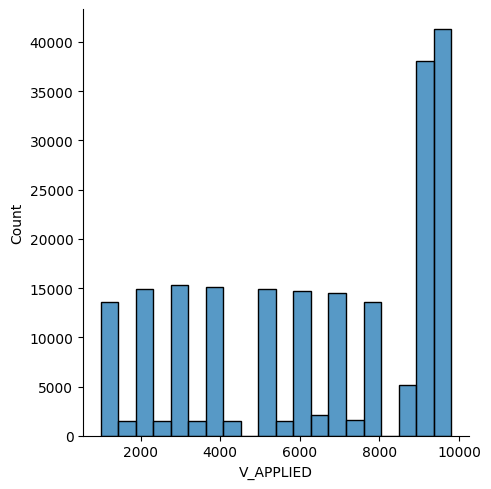

In [ ]:
import seaborn as sns

sns.displot(df_data["V_APPLIED"], bins = 20)

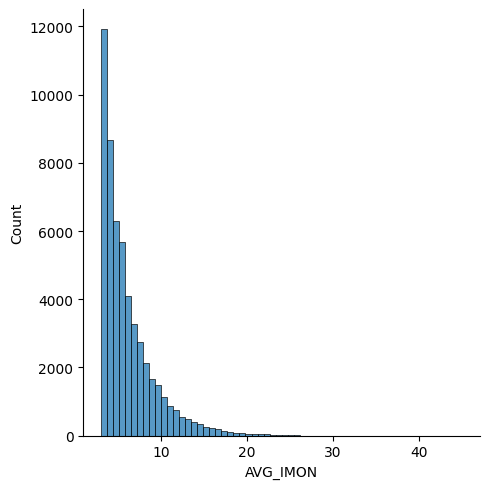

In [ ]:
sns.displot(df_data["AVG_IMON"][df_data["AVG_IMON"]>3], bins = 60)

## plots

**W+2 plot in 04-APR-17**


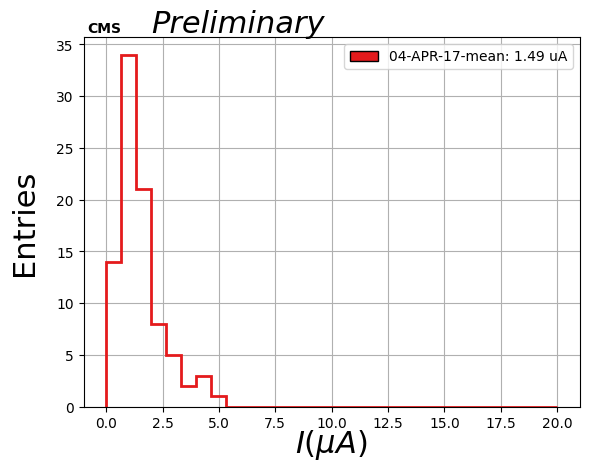

In [ ]:
dates_w2 = np.array(['04-APR-17'])

#Filter the data to return only the chambers in W+2
Wminus2 = individual_wheel('W+2', voltage, df_data = convert_dpid_name(df_data, df_mapping))
plot(Wminus2, dates_w2, bins=30)

### W-2 plot in 18-APR-18

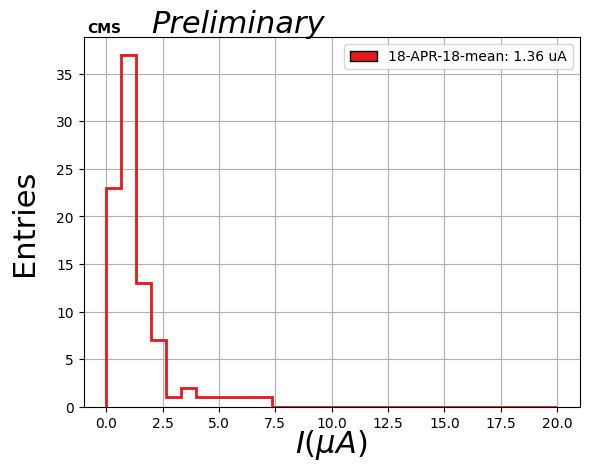

In [ ]:
#dates_w2 = np.array(['2020-03-11', '13/04/2021', '2021-03-03', '25-MAR-18', '2021-07-22'])
#dates_w2 = np.array(['2021-03-03', '2021-04-13', '2021-07-22', '2021-10-14'])
# dates_w2 = np.array(['14-SEP-16','24-JUL-17','27-OCT-17','14-SEP-16','13-SEP-16','18-APR-18','2018-09-20'])
# Wminus2 = individual_wheel('W-2', voltage, df_data = convert_dpid_name(df_data, df_mapping))
# plot(Wminus2, dates_w2, bins=30)

dates_w2 = np.array(['18-APR-18'])
Wminus2 = individual_wheel('W-2', voltage, df_data = convert_dpid_name(df_data, df_mapping))
plot(Wminus2, dates_w2, bins=30)




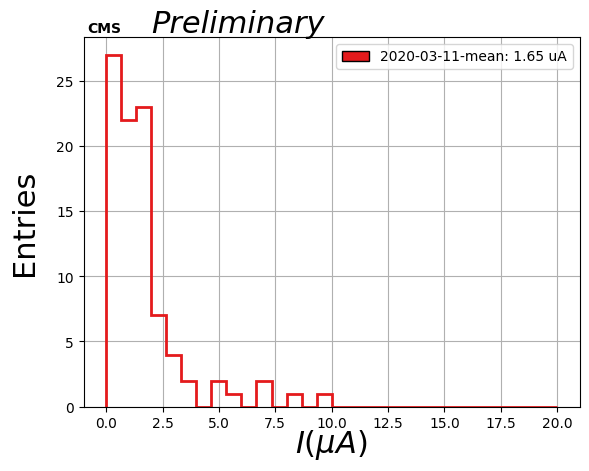

In [ ]:
# dates_w2 = np.array(['2020-03-11','2021-03-03','25-MAR-18','27-JUL-18','27-OCT-17'])
# Wminus2 = individual_wheel('W-2', voltage, df_data = convert_dpid_name(df_data, df_mapping))
# plot(Wminus2, dates_w2, bins=30)

dates_w2 = np.array(['2020-03-11'])
Wminus2 = individual_wheel('W-2', voltage, df_data = convert_dpid_name(df_data, df_mapping))
plot(Wminus2, dates_w2, bins=30)


### **W-1 plot**

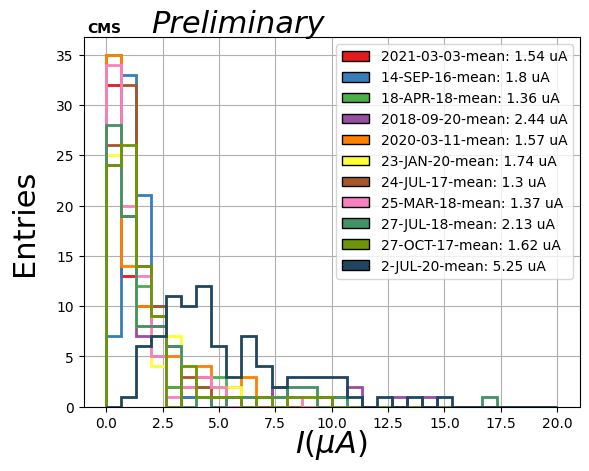

In [ ]:
dates_wm1 = np.array(['2021-03-03','14-SEP-16','18-APR-18','2018-09-20','2020-03-11',
                      '23-JAN-20','24-JUL-17','25-MAR-18','27-JUL-18','27-OCT-17','2-JUL-20'])
Wminus1 = individual_wheel('W-1', voltage, df_data = convert_dpid_name(df_data, df_mapping))
plot(Wminus1, dates_wm1, bins=30)

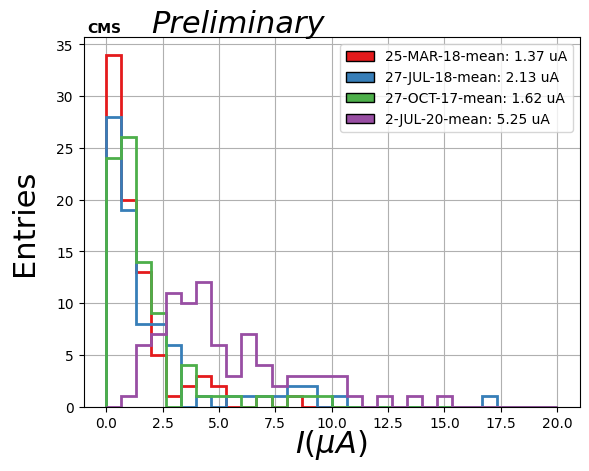

In [ ]:
dates_wm1 = np.array(['25-MAR-18','27-JUL-18','27-OCT-17','2-JUL-20'])
Wminus1 = individual_wheel('W-1', voltage, df_data = convert_dpid_name(df_data, df_mapping))
plot(Wminus1, dates_wm1, bins=30)

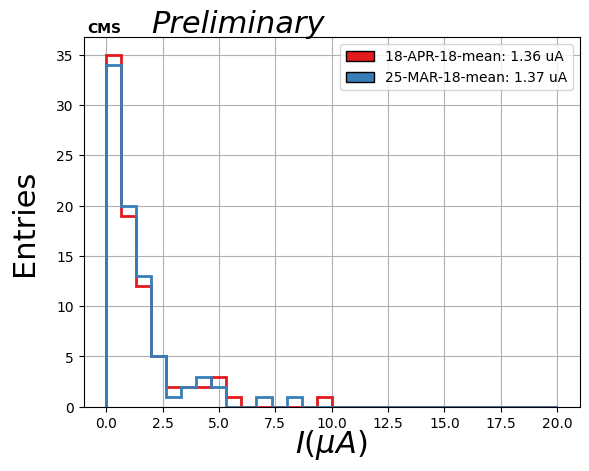

In [ ]:
dates_wm1 = np.array(['18-APR-18','25-MAR-18'])
Wminus1 = individual_wheel('W-1', voltage, df_data = convert_dpid_name(df_data, df_mapping))
plot(Wminus1, dates_wm1, bins=30)

### **W0 plot**

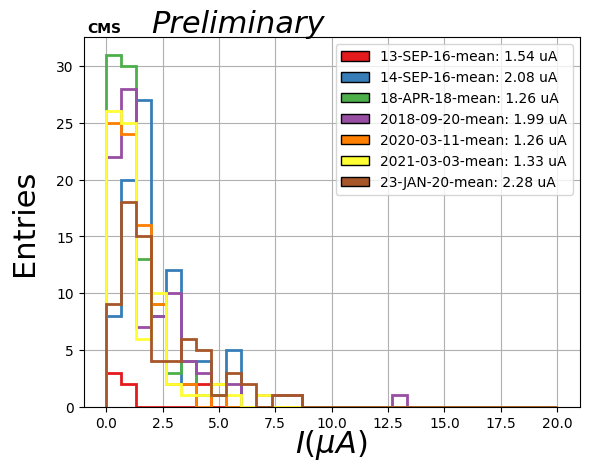

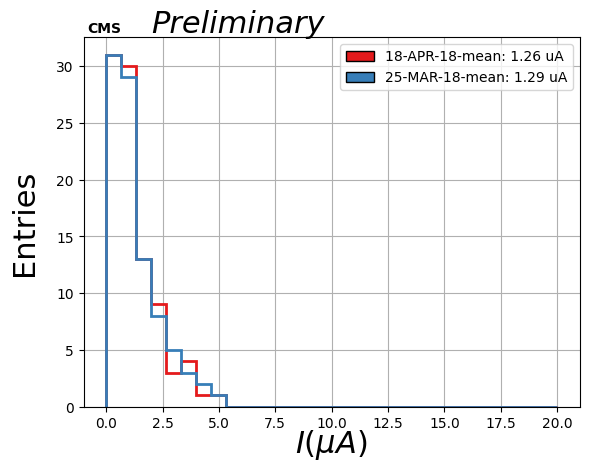

In [ ]:
dates_wzero = np.array(['13-SEP-16','14-SEP-16','18-APR-18','2018-09-20','2020-03-11','2021-03-03','23-JAN-20'])
Wzero = individual_wheel('W0', voltage, df_data = convert_dpid_name(df_data, df_mapping))
plot(Wzero, dates_wzero, bins=30)

dates_wzero = np.array(['18-APR-18','25-MAR-18'])
Wzero = individual_wheel('W0', voltage, df_data = convert_dpid_name(df_data, df_mapping))
plot(Wzero, dates_wzero, bins=30)

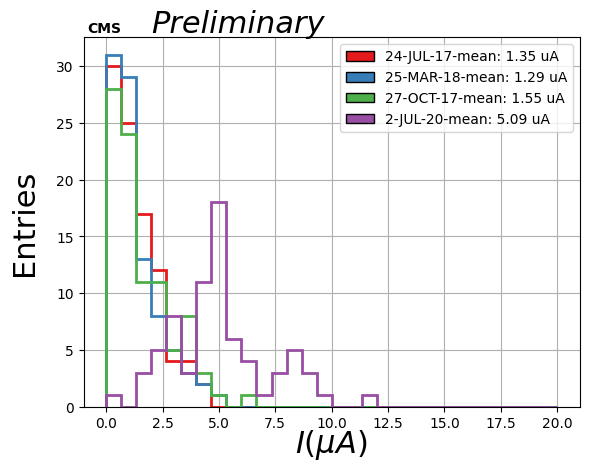

In [ ]:
dates_wzero = np.array(['24-JUL-17','25-MAR-18','27-OCT-17','2-JUL-20'])
Wzero = individual_wheel('W0', voltage, df_data = convert_dpid_name(df_data, df_mapping))
plot(Wzero, dates_wzero, bins=30)

### **W+1 plot**

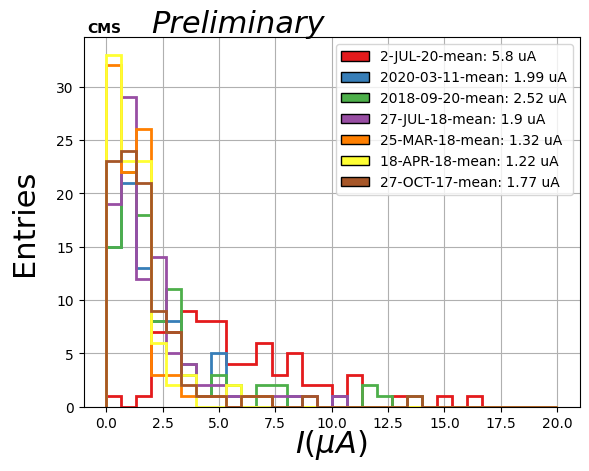

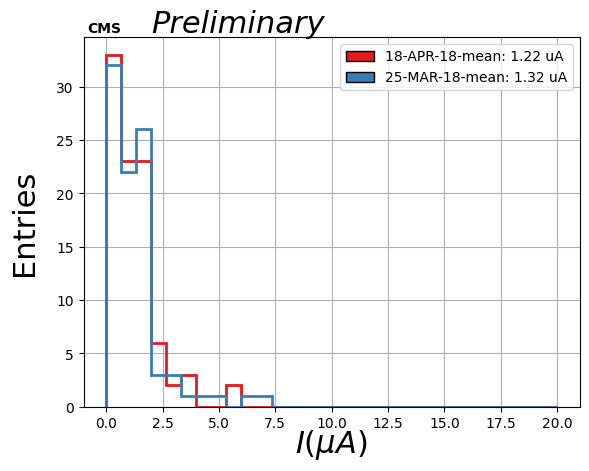

In [ ]:
dates_wzero = np.array(["2-JUL-20",'2020-03-11','2018-09-20','27-JUL-18','25-MAR-18','18-APR-18','27-OCT-17'])
Wzero = individual_wheel('W+1', voltage, df_data = convert_dpid_name(df_data, df_mapping))
plot(Wzero, dates_wzero, bins=30)

dates_wzero = np.array(['18-APR-18','25-MAR-18'])
Wzero = individual_wheel('W+1', voltage, df_data = convert_dpid_name(df_data, df_mapping))
plot(Wzero, dates_wzero, bins=30)

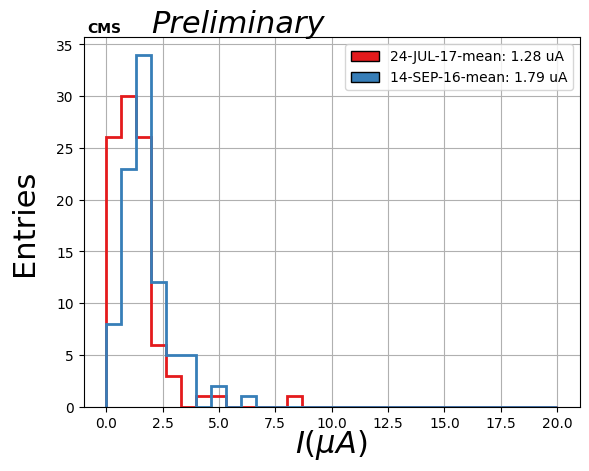

In [ ]:
dates_wzero = np.array(['24-JUL-17','14-SEP-16'])
Wzero = individual_wheel('W+1', voltage, df_data = convert_dpid_name(df_data, df_mapping))
plot(Wzero, dates_wzero, bins=30)

### **W+2 plot**

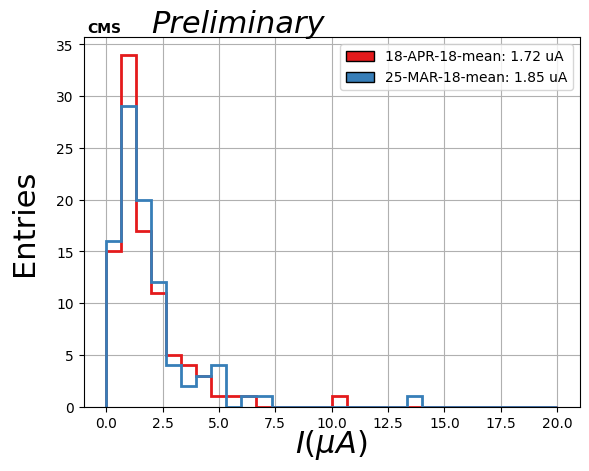

In [ ]:
# dates_wzero = np.array(['14/10/2021','22/07/2021','13/04/2021','2021-03-03','2-JUL-20','2020-03-11','2018-09-20'])
# Wzero = individual_wheel('W+2', voltage, df_data = convert_dpid_name(df_data, df_mapping))
# plot(Wzero, dates_wzero, bins=30)

dates_wzero = np.array(['18-APR-18','25-MAR-18'])
Wzero = individual_wheel('W+2', voltage, df_data = convert_dpid_name(df_data, df_mapping))
plot(Wzero, dates_wzero, bins=30)





### All wheels plot 2018

DPID            7887
DATE            7887
START_DATE      7887
STOP_DATE       7887
V_APPLIED       7887
AVG_IMON        7887
Chamber_name    7887
dtype: int64

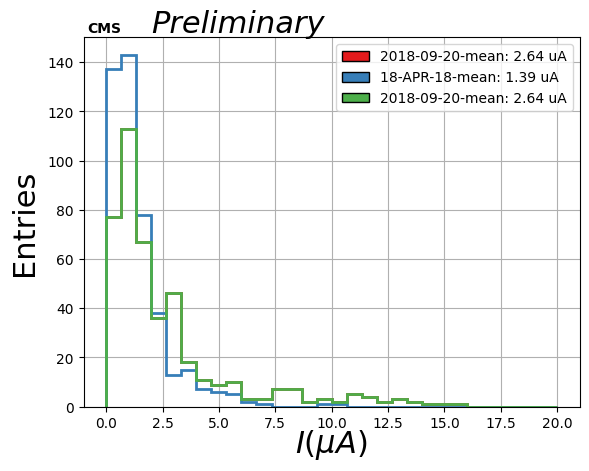

In [ ]:
dates_rest = np.array(['2018-09-20','18-APR-18','2018-09-20'])
AllWheels = individual_wheel('W', voltage, df_data = convert_dpid_name(df_data, df_mapping))
plot(AllWheels, dates_rest, bins=30)


AllWheels.count()

### All endcaps plot in 24-JUL-17

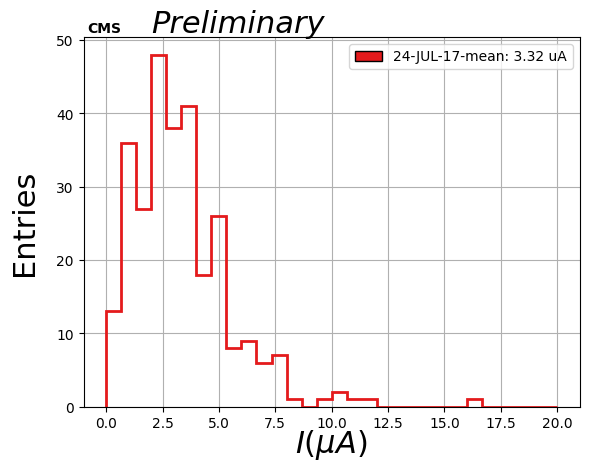

In [ ]:
dates_ed = np.array(['24-JUL-17'])
REminus4 = select_endcap('RE', voltage, df_data = convert_dpid_name(df_data, df_mapping))
plot(REminus4, dates_ed, bins=30)

## Data 2023

In [ ]:
df_data23 = pd.read_csv("https://cernbox.cern.ch/remote.php/dav/public-files/PCuDqetQljJJOjx/last_data_2023.csv")
df_data23.head()

,DPID,DATE,START_DATE,STOP_DATE,V_APPLIED,AVG_IMON
0,315,27-JUL-18 12.42.10.000000000 PM,27-JUL-18 12.42.10.000000000 PM,27-JUL-18 12.51.32.000000000 PM,1000,0.0
1,315,27-JUL-18 12.42.10.000000000 PM,27-JUL-18 12.51.54.000000000 PM,27-JUL-18 01.01.32.000000000 PM,1500,0.0
2,315,27-JUL-18 12.42.10.000000000 PM,27-JUL-18 01.02.01.000000000 PM,27-JUL-18 01.11.33.000000000 PM,2000,0.0
3,315,27-JUL-18 12.42.10.000000000 PM,27-JUL-18 01.11.59.000000000 PM,27-JUL-18 01.21.35.000000000 PM,2500,0.0
4,315,27-JUL-18 12.42.10.000000000 PM,27-JUL-18 01.21.59.000000000 PM,27-JUL-18 01.31.34.000000000 PM,3000,0.0


In [ ]:
df_data23.describe().T

,count,mean,std,min,25%,50%,75%,max
DPID,63832.0,66005.702140,78810.501200,3.150000e+02,3009.000000,3259.0,142951.0,216707.000000
V_APPLIED,63832.0,6465.725655,2908.028609,1.000000e+03,4000.000000,7000.0,9200.0,9800.000000
AVG_IMON,63832.0,2.261522,2.760220,-1.070090e-17,0.554573,1.3,2.9,40.196845


Tenemos 63832 entradas

In [ ]:
df_data23.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 63832 entries, 0 to 63831
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   DPID        63832 non-null  int64  
 1   DATE        63832 non-null  object 
 2   START_DATE  63832 non-null  object 
 3   STOP_DATE   63832 non-null  object 
 4   V_APPLIED   63832 non-null  int64  
 5   AVG_IMON    63832 non-null  float64
dtypes: float64(1), int64(2), object(3)
memory usage: 2.9+ MB


In [ ]:
df_data23.head()

,DPID,DATE,START_DATE,STOP_DATE,V_APPLIED,AVG_IMON
0,315,27-JUL-18 12.42.10.000000000 PM,27-JUL-18 12.42.10.000000000 PM,27-JUL-18 12.51.32.000000000 PM,1000,0.0
1,315,27-JUL-18 12.42.10.000000000 PM,27-JUL-18 12.51.54.000000000 PM,27-JUL-18 01.01.32.000000000 PM,1500,0.0
2,315,27-JUL-18 12.42.10.000000000 PM,27-JUL-18 01.02.01.000000000 PM,27-JUL-18 01.11.33.000000000 PM,2000,0.0
3,315,27-JUL-18 12.42.10.000000000 PM,27-JUL-18 01.11.59.000000000 PM,27-JUL-18 01.21.35.000000000 PM,2500,0.0
4,315,27-JUL-18 12.42.10.000000000 PM,27-JUL-18 01.21.59.000000000 PM,27-JUL-18 01.31.34.000000000 PM,3000,0.0


In [ ]:
df_data23.tail()

,DPID,DATE,START_DATE,STOP_DATE,V_APPLIED,AVG_IMON
63827,216701,21-JUN-23 11.01.16.000000000 AM,21-JUN-23 12.31.06.000000000 PM,21-JUN-23 12.45.32.000000000 PM,8000,3.8
63828,216701,21-JUN-23 11.01.16.000000000 AM,21-JUN-23 12.45.44.000000000 PM,21-JUN-23 01.00.31.000000000 PM,8500,4.2
63829,216701,21-JUN-23 11.01.16.000000000 AM,21-JUN-23 01.00.59.000000000 PM,21-JUN-23 01.15.34.000000000 PM,9000,4.2
63830,216701,21-JUN-23 11.01.16.000000000 AM,21-JUN-23 01.15.39.000000000 PM,21-JUN-23 01.30.27.000000000 PM,9200,4.6
63831,216701,21-JUN-23 11.01.16.000000000 AM,21-JUN-23 01.30.27.000000000 PM,21-JUN-23 04.35.27.000000000 PM,9400,4.6


In [ ]:
df_data23["DATE"].unique()

array(['27-JUL-18 12.42.10.000000000 PM',
       '20-SEP-18 07.49.24.000000000 PM',
       '25-MAR-18 04.23.24.000000000 PM',
       '20-SEP-18 07.49.34.000000000 PM',
       '27-JUL-18 12.42.11.000000000 PM',
       '20-SEP-18 10.29.24.000000000 PM',
       '20-SEP-18 07.49.36.000000000 PM',
       '25-MAR-18 04.23.12.000000000 PM',
       '25-MAR-18 04.23.22.000000000 PM',
       '27-JUL-18 12.42.25.000000000 PM',
       '25-MAR-18 04.23.20.000000000 PM',
       '25-MAR-18 04.23.28.000000000 PM',
       '25-MAR-18 04.23.39.000000000 PM',
       '27-JUL-18 12.42.20.000000000 PM',
       '25-MAR-18 04.23.36.000000000 PM',
       '27-JUL-18 12.42.22.000000000 PM',
       '27-JUL-18 12.42.21.000000000 PM',
       '25-MAR-18 04.23.32.000000000 PM',
       '25-MAR-18 04.23.25.000000000 PM',
       '27-JUL-18 01.02.27.000000000 PM',
       '25-MAR-18 04.23.51.000000000 PM',
       '25-MAR-18 04.23.04.000000000 PM',
       '27-JUL-18 12.41.52.000000000 PM',
       '20-SEP-18 07.49.14.0000000

In [ ]:
df_data23["AVG_IMON"].unique()

array([0.        , 0.1       , 0.03031359, ..., 4.23699286, 4.55508596,
       2.66682129])

In [ ]:
len(df_data23[df_data23["AVG_IMON"]>1])

36009